# Анализ полученных данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('/content/articles.csv')

Смотрим на наши данные

In [4]:
data.head()

,id,url,title,subtitle,summary,content,datetime,topic
0,1455725,https://russian.rt.com/world/article/1455725-e...,Существенные разногласия: как в ЕС намерены от...,Премьер Италии призвала ЕС не реагировать инст...,Премьер-министр Италии Джорджа Мелони призвала...,Руководство Европейского союза должно сохранят...,2025-03-29 00:00:00,world
1,1455731,https://russian.rt.com/world/article/1455731-s...,«Закабаление целой страны»: что известно о нов...,Договор с США о полезных ископаемых может поме...,Новый вариант договора о полезных ископаемых п...,Новый проект соглашения о полезных ископаемых ...,2025-03-28 20:41:00,world
2,1455757,https://russian.rt.com/world/article/1455757-o...,«Это было очень страшно»: очевидцы — о землетр...,Очевидцы рассказали о землетрясении в Мьянме и...,"В Бангкоке, где сейчас, по данным АТОР, находя...","В Таиланде произошло мощное землетрясение, в Б...",2025-03-28 17:41:00,world
3,1455152,https://russian.rt.com/world/article/1455152-e...,Идеология против прагматизма: как ЕС препятств...,ЕС сохранит санкции до полного вывода российск...,Евросоюз не намерен снимать санкции с РФ до те...,Евросоюз может смягчить или снять антироссийск...,2025-03-28 00:32:00,world
4,1455303,https://russian.rt.com/world/article/1455303-r...,Погибли шесть россиян: что известно об аварии ...,Шесть россиян погибли при аварии туристическог...,В результате аварии прогулочного батискафа в Х...,Шесть россиян погибли в результате аварии прог...,2025-03-27 23:03:00,world


Посмотрим на общую информацию по нашим данным

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            5000 non-null   int64         
 1   url           5000 non-null   object        
 2   title         4888 non-null   object        
 3   subtitle      4100 non-null   object        
 4   summary       4888 non-null   object        
 5   content       4595 non-null   object        
 6   datetime      4888 non-null   datetime64[ns]
 7   topic         5000 non-null   object        
 8   year          4888 non-null   float64       
 9   month         4888 non-null   object        
 10  weekday       4888 non-null   object        
 11  len_title     4888 non-null   float64       
 12  len_subtitle  4100 non-null   float64       
 13  len_content   4595 non-null   float64       
 14  len_summary   4888 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int6

Можно заметить, что кол-во статей без заголовка и без даты одинаковое количество, это говорит о том, что возможно эти статьи удалили, но они до сих пор присутствуют на новостном ресурсе.
Также достаточно много статей без подзаголовка, поэтому в будущем этот критерий можно отбросить.
Имеются статьи без контента, но это скорее всего связано с тем, что вместо текстового контента там присутствует графический контент (а точнее видеоролики).

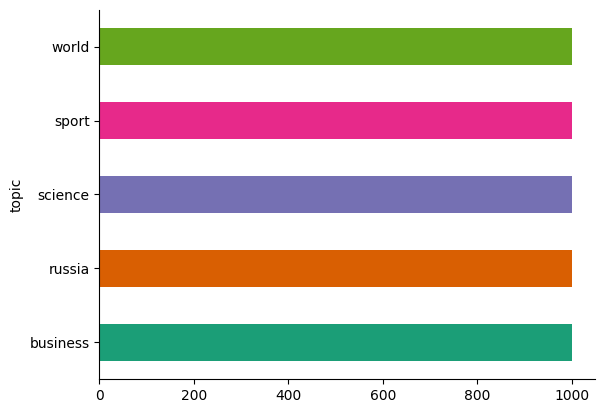

In [5]:
data.groupby('topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right', ]].set_visible(False)

Видим, что категории сбалансированы, что впринципе ожидаемо, поскольку мы сами настроили наш парсер на определнное кол-во статей по темам

In [6]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.strftime('%B')
data['weekday'] = data['datetime'].dt.strftime('%A')

Выводы по графику ниже:
- больше всего новостей написано в 2024г., что не удивительно, поскольку 2025ый год только начался
- кол-во статей в месяцы: май, апрель, июнь и июль снижено
- больше всего статей выкладывают по четвергам, меньше всего - в выходные

Text(0.5, 1.0, 'Count news by datetime')

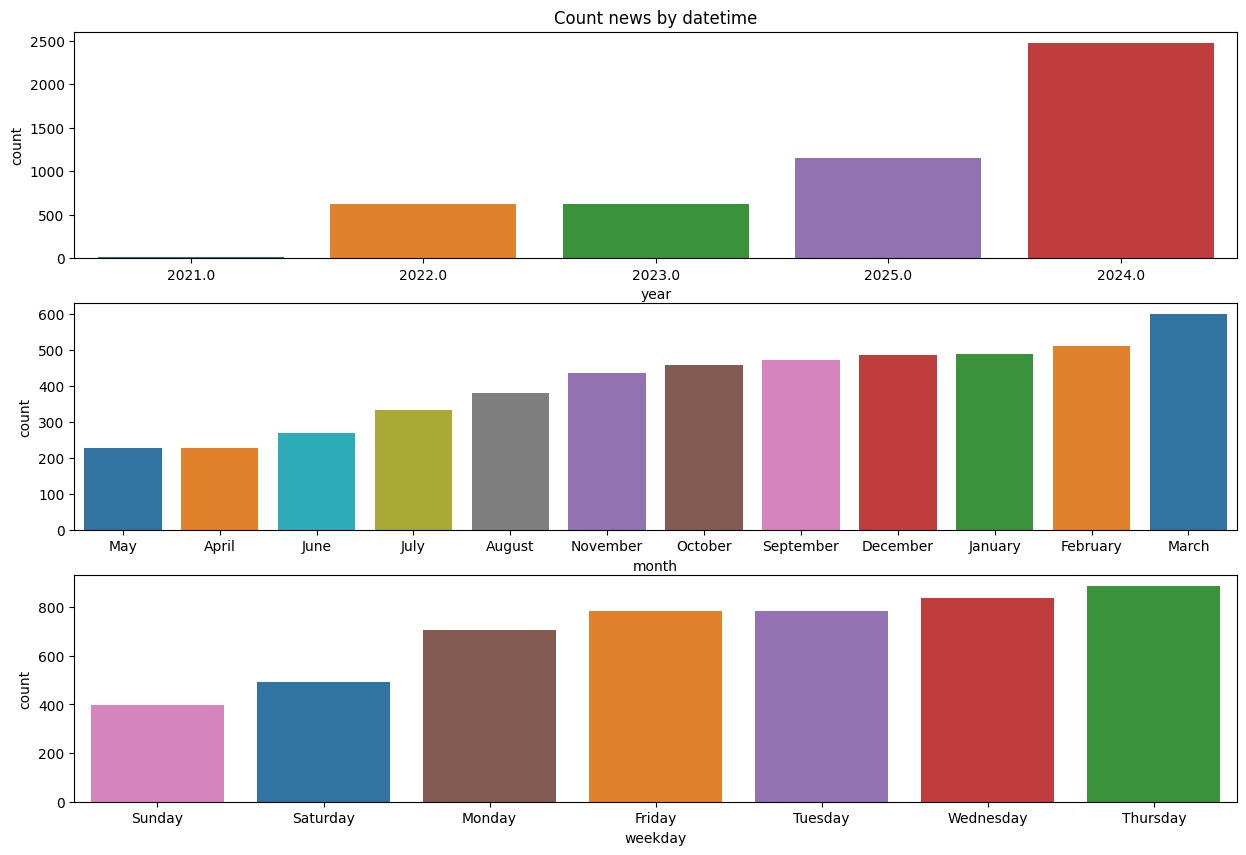

In [7]:
fig, axs = plt.subplots(3, 1, figsize = (15, 10), dpi = 100)
for ind, col in enumerate(['year', 'month', 'weekday']):
  sns.countplot(x= data[col], hue=data[col], palette='tab10', ax = axs[ind], order = data[col].value_counts(ascending=True).index, legend=False)
axs[0].set_title('Count news by datetime')


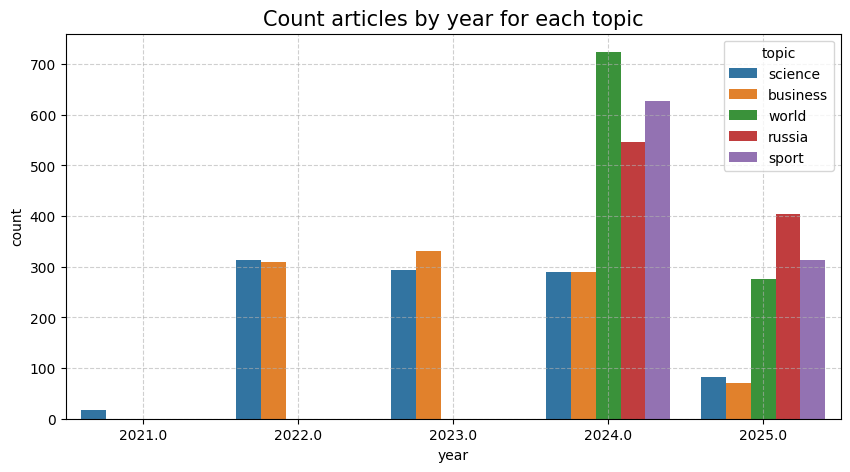

In [8]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='year', data=data, hue='topic', palette='tab10')
plt.grid(True, linestyle='--',alpha=0.6)
plt.title('Count articles by year for each topic', fontdict = {'fontsize' : 15})
plt.show()

Мы видим, что тема WORLD, RUSSIA и SPORT сильно выросла в 2024 г., тогда как темы бизнес и наука находятся примерно на одном уровне все годы начиная с 2022

Посчитаем длину заголовков и основного текста

In [9]:
data['len_title'] = data['title'].str.len()
data['len_subtitle'] = data['subtitle'].str.len()
data['len_content'] = data['content'].str.len()
data['len_summary'] = data['summary'].str.len()

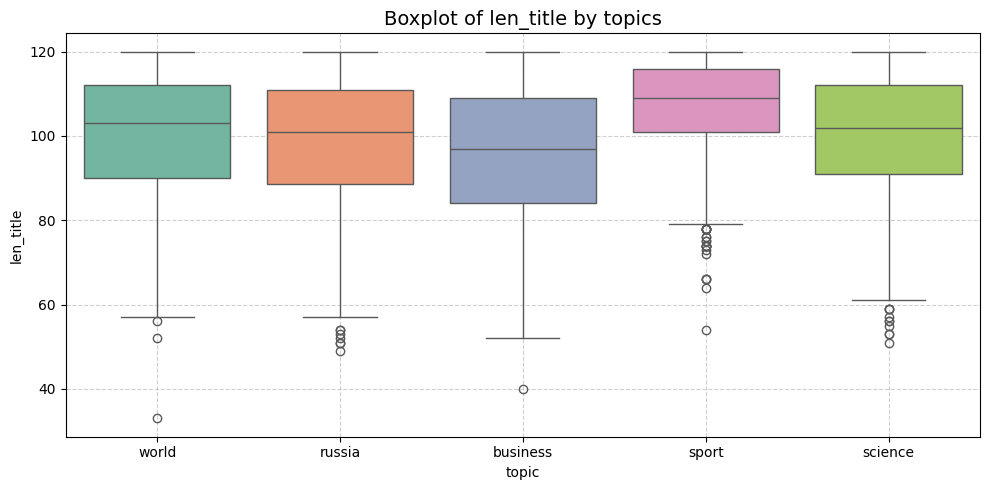

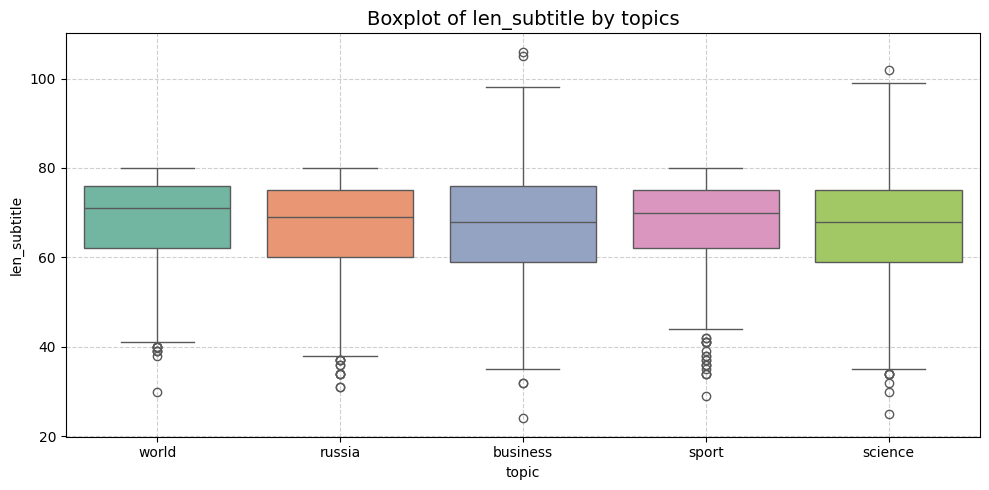

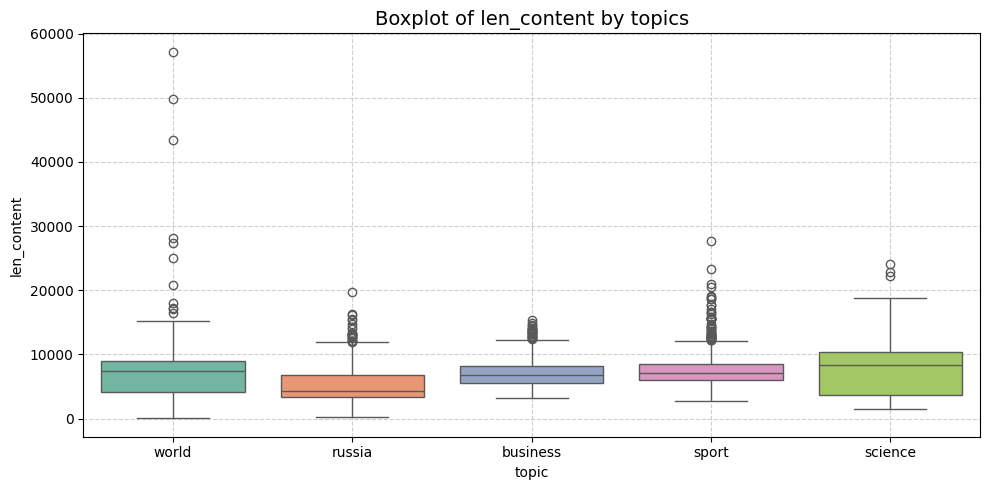

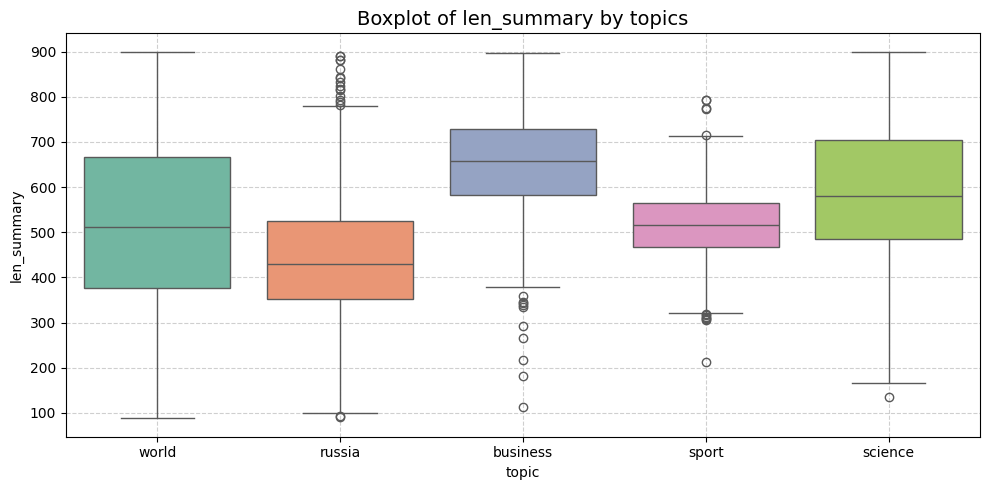

In [10]:
for col in ['len_title', 'len_subtitle', 'len_content', 'len_summary']:
  fig, ax = plt.subplots(1, 1, figsize = (10, 5), dpi = 100)
  sns.boxplot(x='topic', y=col, data=data, ax=ax, palette='Set2', hue = 'topic', dodge=False)
  plt.title(f'Boxplot of {col} by topics', fontsize = 14)
  plt.grid(True, linestyle = '--', alpha=0.6)
  plt.tight_layout()
  plt.show()

Выводы по длинам заголовков и текста:

- ср. длина заголовков по категориям около 100 символов и имеется ограничение по верхней границе
- Ср. длина подзаголовка около 70 символов
- Длина текста имеет длинные хвосты по теме world

Посмотрим, какие слова часто встречаются в разных тематиках

In [11]:
stop_words = stopwords.words('russian')
stop_words.extend(['что', 'это', 'так',
                    'вот', 'быть', 'как',
                    'в', '—', 'к', 'за', 'из', 'из-за',
                    'на', 'ок', 'кстати',
                    'который', 'мочь', 'весь',
                    'еще', 'также', 'свой',
                    'ещё', 'самый', 'ул', 'комментарий',
                    'английский', 'язык', 'почему', 'её', 'все', 'всё', 'по', 'я'])

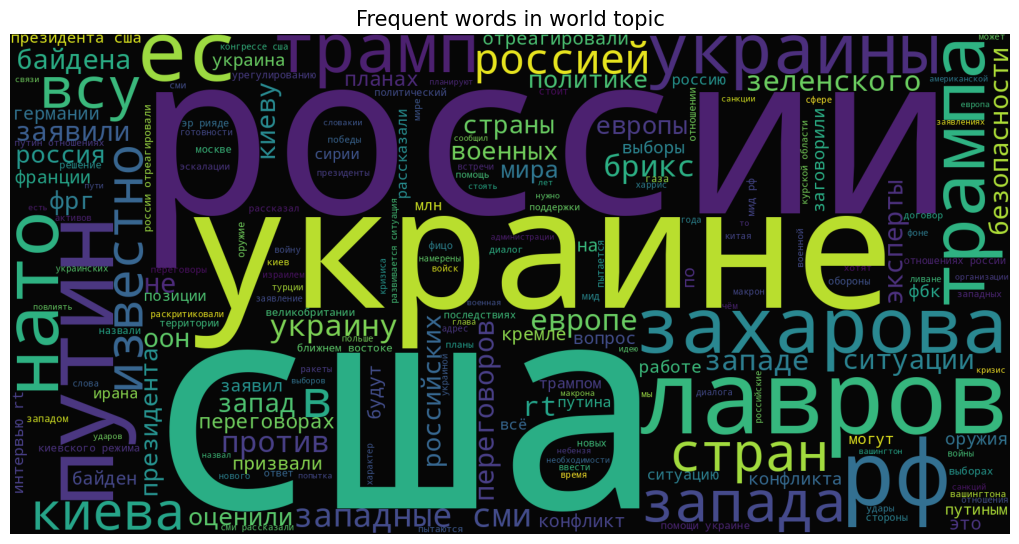

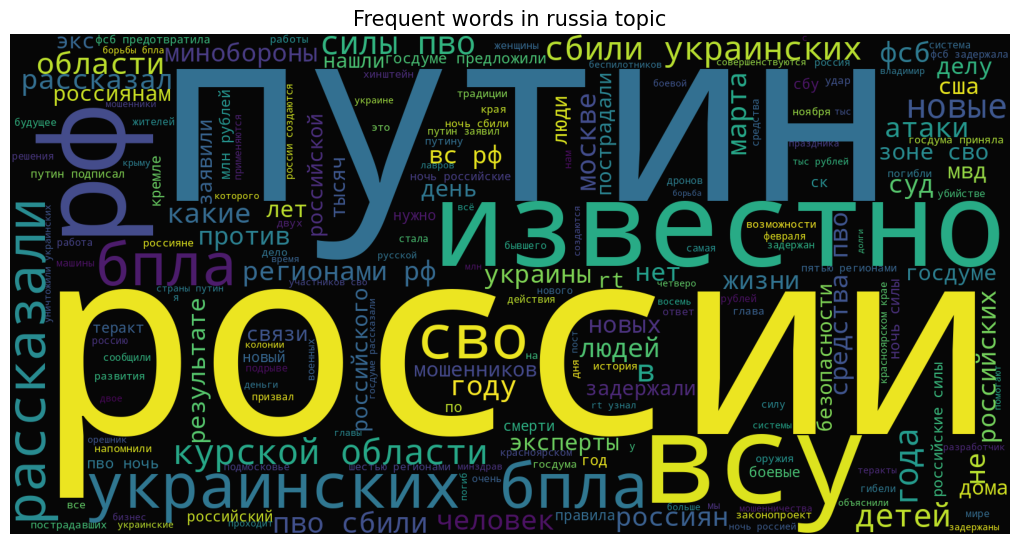

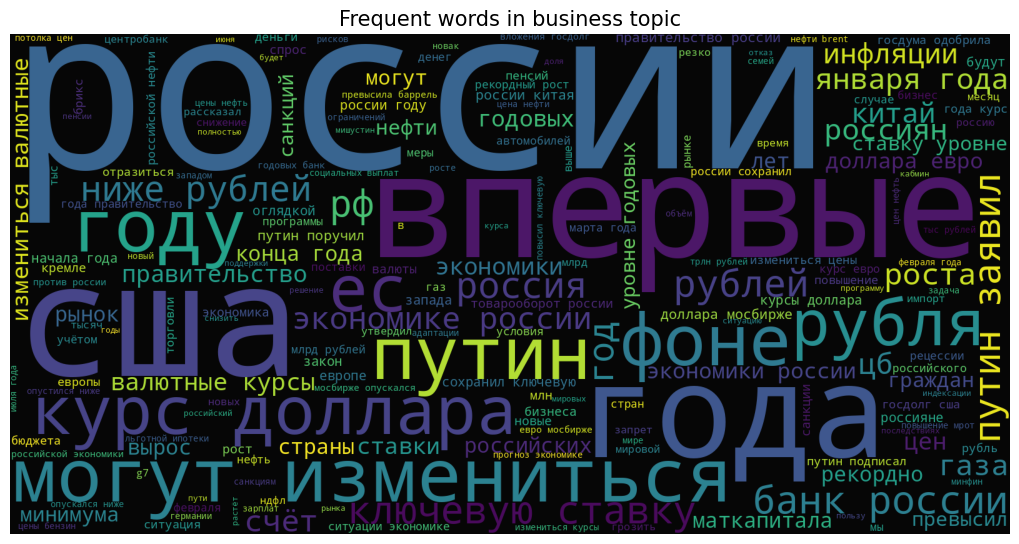

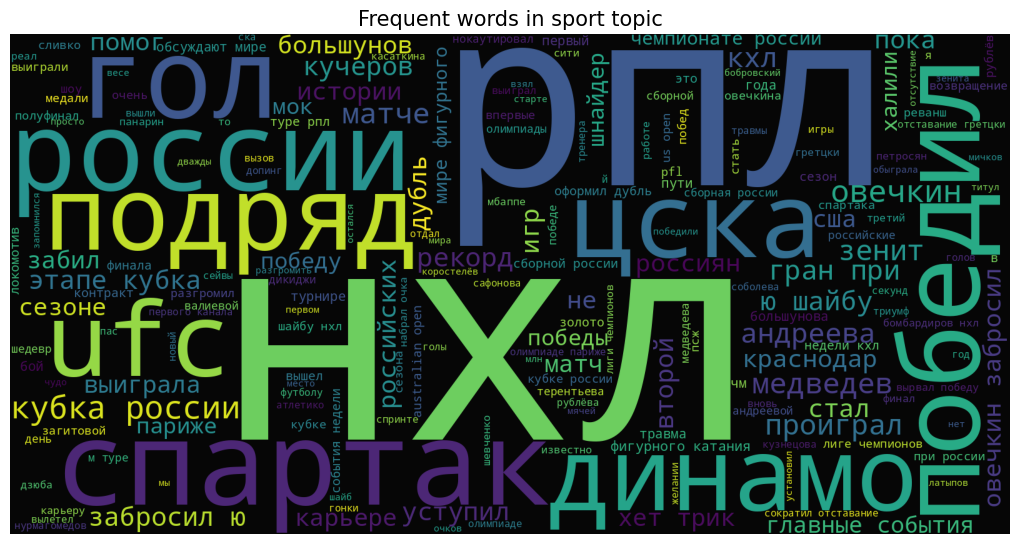

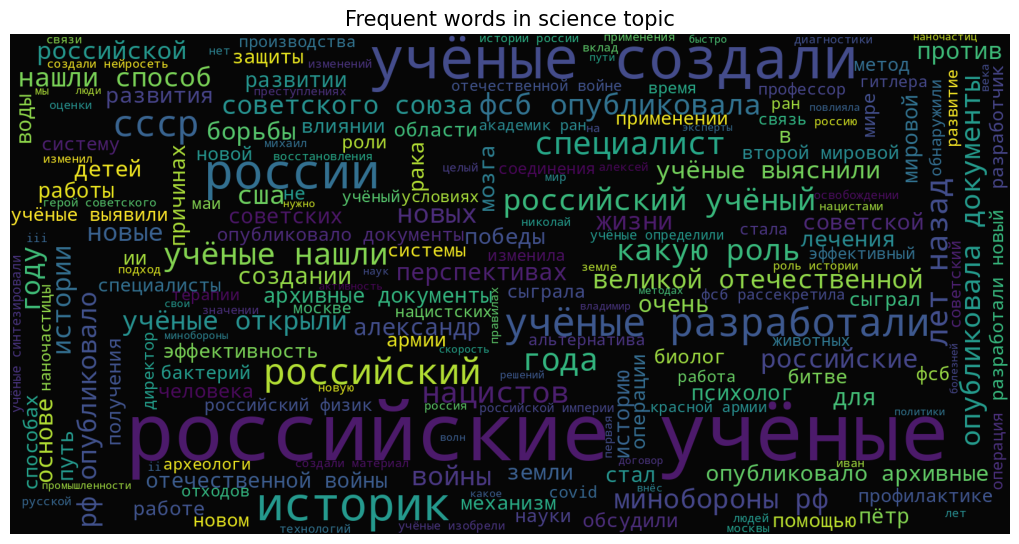

In [12]:
for topic in data.topic.unique():
  words = data[data['topic'] == topic].title.str.split(' ').explode().values
  words = [word.lower() for word in words if isinstance(word, str) and str(word).lower() not in stop_words]

  wc = WordCloud(background_color='black', width=1600, height=800)
  wc.generate(' '.join(words))

  fig, ax = plt.subplots(1, 1, figsize = (10, 7))
  plt.axis('off')
  plt.tight_layout(pad=0)
  ax.set_title(f'Frequent words in {topic} topic', fontsize = 15)
  ax.imshow(wc, alpha = 0.98)


**Выводы**

Был проведен первичный анализ датасета. Поскольку мы сами собирали все статьи с помощью созданного нами парсера, то статьи по тематикам распределены равномерно.
Статьи относятся к периодам с 2021 по 2025 г., а больше всего статей в январе, феврале и марте, но это потому что мы выгружали статьи в обратном хронологическом порядке. Меньше всего статей публикуется в выходные, а больше всего приходится на среду и четверг.

У многих статей отсутсвует подзаголовок, в последствии можно будет удалить этот признак. В среднем длина заголовка по всем темам составляет 100 символов. Длина текстов статей имеет тяжелые хвосты, особенно по теме world.

Мы также проанализировали основные ключевые слова, которые наводят на гипотезу о том, что статьи разных тематик могут быть сильно похожи по доминирующим ключевым словам и тем самым негативно влиять на модель. Это нужно будет иметь в виду при построоении модели.

Поскольку мы работаем с текстами, на этом этапе пока не столь очевидно, какие данные и по какой причине стоит считать выбросами, а какие - особенностями конкретной тематики. Поэтому это мы оставим на следующие этапы работы над проектом.